<a href="https://colab.research.google.com/github/vladimyr02/cd-Vladimyr-Gonzalez-2023/blob/main/ProyectoFinalClaseCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyproj

In [ ]:
!pip install geopandas

In [ ]:
!pip uninstall cython -y
!pip install cython
!pip uninstall cartopy -y
!pip install cartopy

Found existing installation: Cython 3.0.2
Uninstalling Cython-3.0.2:
  Successfully uninstalled Cython-3.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 32.3 MB/s eta 0:00:00


In [ ]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.1-cp310-cp310-linux_x86_64.whl size=890042 sha256=0b13657d42a3ad2976da40ef5c7f53046bdc23f3e09daf3f3ec25ebbef0e7ff6
  Stored in directory: /root/.cache/pip/wheels/07/bd/06/4e979fa263bca266484ee65f5aab8e6b1c9b20f8caa6f2d7da
Successfully built shapely


In [ ]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time

In [ ]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
#ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [ ]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


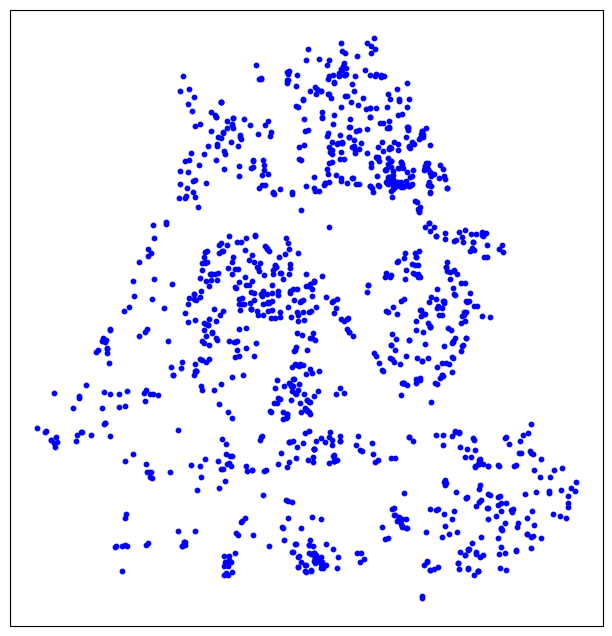

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)
plt.show()

In [ ]:
#Se carga la cartografía de Floridablanca/Melbourne
url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

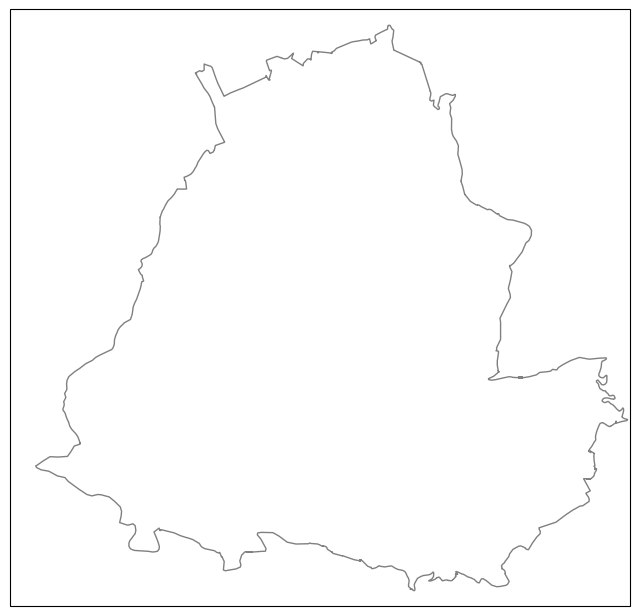

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

plt.show()

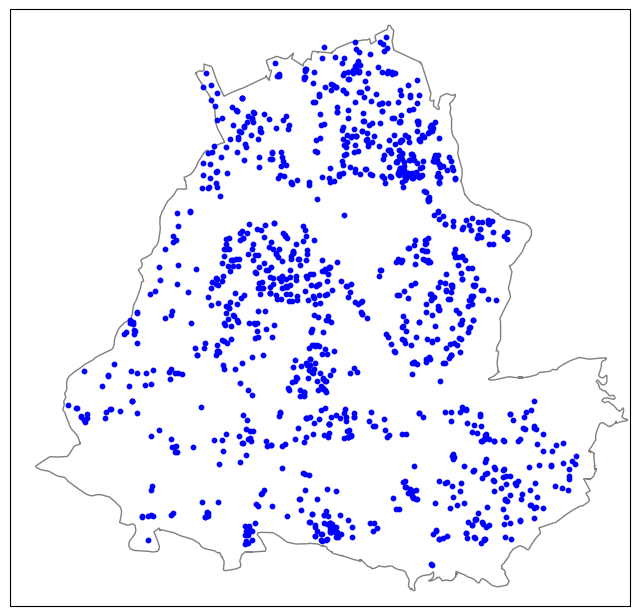

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

plt.show()

In [ ]:
import geopandas as gpd
import urllib.request

def calculate_polygon_area(df, shapefile_url):
    """
    Calculate the area of a polygon using a shapefile.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the longitude and latitude data.
    - shapefile_url (str): The URL of the shapefile to use for the area calculation.

    Returns:
    - area (float): The area of the polygon in square meters.
    """

    # Download the shapefile files
    url = shapefile_url
    file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]
    for file in file_list:
        urllib.request.urlretrieve(url + file, file)

    # Read the shapefile into a GeoDataFrame
    gdf = gpd.read_file('68276_urbano.shp')

    # Ensure the GeoDataFrame is in a suitable projection (e.g., UTM)
    gdf = gdf.to_crs('EPSG:32618')  # Change 'EPSG:32618' to the appropriate UTM zone for your area

    # Calculate the area and sum it up (in square meters)
    area = gdf.geometry.area.sum()

    return area

# Example usage:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
shapefile_url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'
polygon_area = calculate_polygon_area(df, shapefile_url)
print(f"Area of the polygon: {polygon_area} square meters")


Area of the polygon: 14180920.862356503 square meters


In [ ]:
import numpy as np

# Función para calcular la distancia euclidiana entre dos puntos
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Función para calcular el índice de Ripley con una distancia fija
def ripley_k_fixed_distance(data, fixed_distance):
    n = len(data)
    count = 0

    for i in range(n):
        for j in range(n):
            if j > i:
                dist = euclidean_distance(data[i], data[j])
                if dist <= fixed_distance:
                    count += 1

    ripley_value = (polygon_area/(n*n))*count #(count / n) / (np.pi * fixed_distance * fixed_distance)
    return ripley_value


In [ ]:
# Crear una lista de coordenadas UTM
utm_coords = df[['longitud', 'latitud']].values
utm_coords

array([[-73.10250092,   7.07601118],
       [-73.10540009,   7.07949543],
       [-73.09100342,   7.09029007],
       ...,
       [-73.10326385,   7.09139061],
       [-73.09700012,   7.06108332],
       [-73.08044434,   7.06252098]])

In [ ]:
# Distancia fija de 100 unidades UTM
fixed_distance = 100

# Calcular el índice de Ripley con la distancia fija para el conjunto original
ripley_original = ripley_k_fixed_distance(utm_coords, fixed_distance)
ripley_original

7084841.999774782

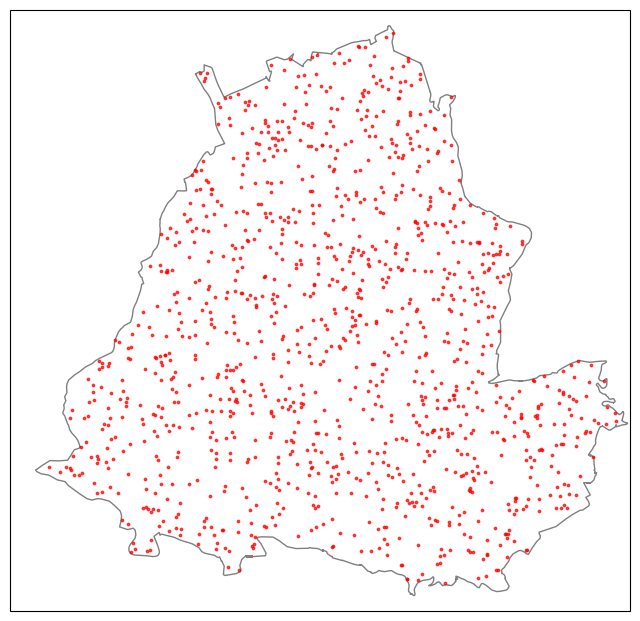

In [ ]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
import cartopy.crs as ccrs

# Cargar el archivo shapefile
gdf = gpd.read_file('68276_urbano.shp')

# Obtener el polígono como una instancia de Polygon
polygon = gdf.unary_union

# Número de puntos aleatorios deseados
num_points = 1200

# Generar puntos aleatorios dentro del polígono
random_points = []
while len(random_points) < num_points:
    x = np.random.uniform(polygon.bounds[0], polygon.bounds[2])
    y = np.random.uniform(polygon.bounds[1], polygon.bounds[3])
    point = Point(x, y)
    if point.within(polygon):
        random_points.append(point)

# Convierte la lista de puntos aleatorios en un GeoDataFrame
random_gdf = gpd.GeoDataFrame(geometry=random_points, crs=gdf.crs)

# Graficar el polígono y los puntos aleatorios
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

# Dibuja el polígono primero
for poli in gdf['geometry']:
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray', zorder=1)

# Luego, dibuja los puntos aleatorios (por encima del polígono)
random_gdf.plot(ax=ax, marker='o', color='red', markersize=3, alpha=0.7, zorder=2)

plt.show()


In [ ]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon, Point
import pyproj

# Cargar el archivo shapefile
gdf = gpd.read_file('68276_urbano.shp')

# Definir el sistema de coordenadas original (latitud y longitud)
crs_original = {'init': 'epsg:4326'}

# Obtener el polígono como una instancia de Polygon
polygon = gdf.unary_union

# Número de puntos aleatorios deseados
num_points = 1262

utm_coords_random_list=[]

for _ in range(9):
  # Generar puntos aleatorios dentro del polígono
  random_points = []
  while len(random_points) < num_points:
      x = np.random.uniform(polygon.bounds[0], polygon.bounds[2])
      y = np.random.uniform(polygon.bounds[1], polygon.bounds[3])
      point = Point(x, y)
      if point.within(polygon):
          random_points.append(point)

  # Definir el sistema de coordenadas de destino (UTM, Zona 18 Norte)
  crs_destination = {'init': 'epsg:32618'}

  # Crear el transformador de coordenadas
  transformer = pyproj.Transformer.from_crs(crs_original, crs_destination, always_xy=True)

  # Convertir los puntos aleatorios a UTM
  utm_coords_random = [transformer.transform(point.x, point.y) for point in random_points]
  utm_coords_random_list.append(utm_coords_random)

utm_coords_random_list


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


[[(709669.1094662726, 781837.7906586736),
  (711663.7611812918, 783360.3142698049),
  (709001.0181027697, 782614.7400027493),
  (710290.3567819414, 784341.5458829162),
  (710485.2612481205, 781355.4919712129),
  (711580.8329323314, 782843.6285962249),
  (710528.3502612797, 781688.1860356643),
  (709547.3403177878, 783508.600978912),
  (711638.1312083213, 782566.3922378863),
  (709093.5018577665, 783678.2165997146),
  (712552.98464524, 781798.8574703943),
  (709640.9705099165, 781929.8913035638),
  (708945.7839479359, 783053.3184073016),
  (711365.0724179287, 783111.1533852277),
  (711653.2934449918, 782278.7502322514),
  (709801.2848790735, 781799.9582988552),
  (710965.2218274283, 782757.2118030409),
  (708732.30526772, 781201.3179818697),
  (710848.1853547553, 783839.9824581193),
  (709831.599348018, 780904.7861387986),
  (710510.5050056068, 783164.1001104447),
  (712292.149565532, 780965.2142049461),
  (709296.3272196098, 783386.1743012638),
  (709598.4588184578, 780742.1944432163),

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


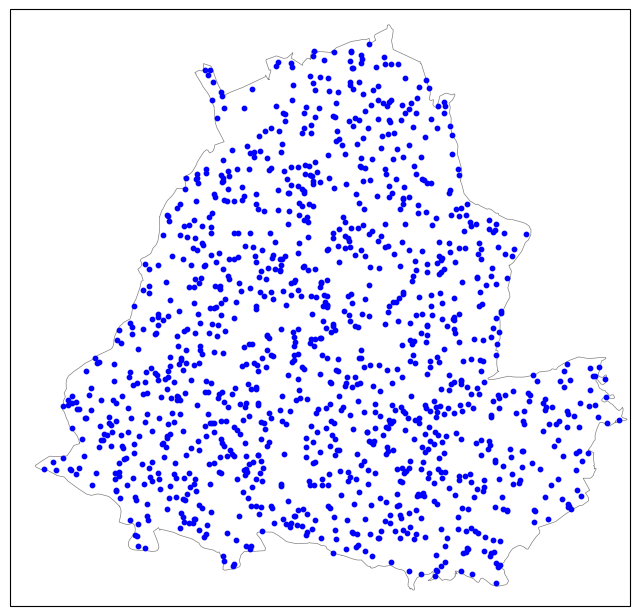

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import shapefile
import numpy as np

# Coordenadas UTM de la región de interés
lower_easting = 600000
upper_easting = 650000
lower_northing = 7500000
upper_northing = 7550000

# Crear la figura y el eje con la proyección PlateCarree
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

# Agregar características de fondo, como la costa
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

# Cargar el shapefile de los límites de la región
sf = shapefile.Reader('68276_urbano.shp')
shapes = sf.shapes()
for shape in shapes:
    vertices = np.array(shape.points)
    ax.plot(vertices[:, 0], vertices[:, 1], transform=ccrs.PlateCarree(), color='gray', linewidth=0.5)

# Generar puntos aleatorios en coordenadas UTM
num_points = len(utm_coords_random)
x_coords, y_coords = zip(*utm_coords_random)

# Graficar los puntos aleatorios
ax.scatter(x_coords, y_coords, transform=ccrs.UTM(18), zorder=10, c='b', s=10)

plt.show()


In [ ]:

# Generar 9 grupos de puntos aleatorios (menos grupos) y calcular el índice de Ripley con la distancia fija para cada uno
num_random_groups = 9  # Reducido el número de grupos aleatorios
ripley_random_values = []
for _ in range(num_random_groups):
  ripley_result = ripley_k_fixed_distance(utm_coords_random_list[_], fixed_distance)
  ripley_random_values.append(ripley_result)
ripley_random_values


[15012.163781694506,
 15831.332861122675,
 14878.603605700782,
 15599.828556066888,
 15519.692450470653,
 15341.612215812356,
 14798.467500104547,
 14388.882960390463,
 15252.572098483208]

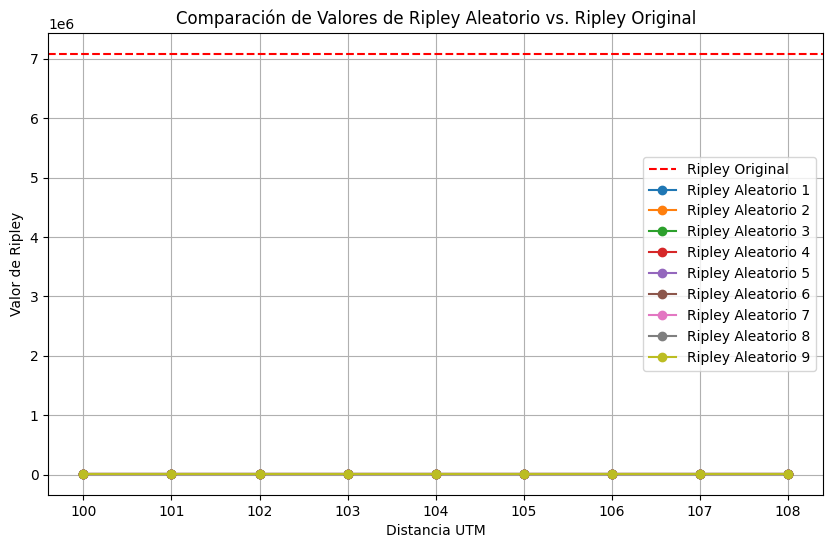

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Distancias en UTM, podrías obtener estas distancias a partir de los datos, pero aquí se usará una secuencia simple para el ejemplo.
distances_utm = np.arange(100, len(ripley_random_values) + 100)

# Valor de Ripley K original (constante)
ripley_original_value = ripley_original

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar el valor de Ripley Original como una línea horizontal
plt.axhline(y=ripley_original_value, color='red', linestyle='--', label='Ripley Original')

# Graficar cada valor de Ripley Aleatorio como una línea separada
for i, ripley_random in enumerate(ripley_random_values):
    label = f'Ripley Aleatorio {i + 1}'  # Etiqueta para cada línea
    plt.plot(distances_utm, [ripley_random] * len(distances_utm), label=label, linestyle='-', marker='o')

# Etiquetas de los ejes y leyenda
plt.xlabel('Distancia UTM')
plt.ylabel('Valor de Ripley')
plt.legend()

# Título de la gráfica
plt.title('Comparación de Valores de Ripley Aleatorio vs. Ripley Original')

# Mostrar la gráfica
plt.grid(True)
plt.show()
